# 5. Условные математические ожидания и условные распределения II


In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'

![Задание](./img/p5_3.png)

### Решение

In [53]:
data = pd.read_csv("../6.xls", header=None)
data = np.array(data[3:], dtype=np.float32)
data = data.reshape(len(data),)

In [38]:
## в файле содержаться времена 
## выхода серверов из строя
data[:5]

array([  6.8046999 ,  25.0515995 ,  29.82970047,  30.93790054,  32.83089828], dtype=float32)

#### Вывод формулы $E(N_t|N_s)$:
Воспользуемся линейностью условного матожидания:

$E(N_t|N_s) = E(N_t-N_s|N_s) + E(N_s|N_s) =  E(N_t-N_s|N_s) + N_s$

Известно что 
* $(N_t-N_s) \sim Pois(\lambda(t-s))$;
* $(N_t-N_s)$ независимо c $N_s$

Следовательно, $E(N_t|N_s) = E(N_t-N_s) + N_s$ и $E(N_t|N_s) = \lambda(t-s) + N_s$


In [52]:
num_over(1000)

63

In [66]:
## взято из файла
lambda_ = 15
t_0 = 50
t = 15000

In [70]:
def plot_predictions(lambda_, t_0, t):
    def num_over(t_):
        return np.sum(data<=t_)

    prediction = []
    time = []
    game_over = []  # Вышло из строя на данный момент согласно файлику

    for i in range(t//t_0):
        time.append(t_0*(i+1))
        game_over.append(num_over(time[-1]))  
        prediction.append(((t-time[-1])*lambda_) + game_over[-1])

    plt.plot(time, prediction, label='Prediction')
    plt.plot(time, game_over, label='Reality')
    plt.semilogy()
    plt.title("Количество поломанных серверов\n Предсказанное и реальное")
    plt.ylabel("Количество поломанных серверов")
    plt.xlabel("Время")
    plt.legend(fontsize=15)
    plt.show()
    return prediction

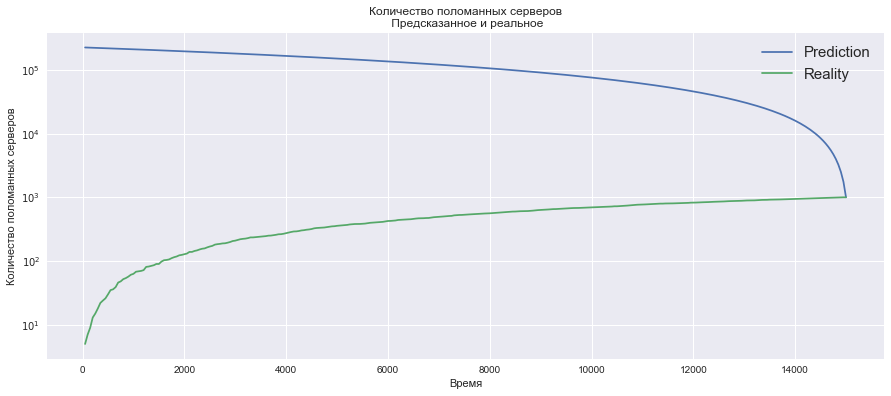

In [72]:
pred_15 = plot_predictions(lambda_, t_0, t)

Если взять lambda_ поменьше, то сходится получше и побыстрее. 
И значения ближе к истине.

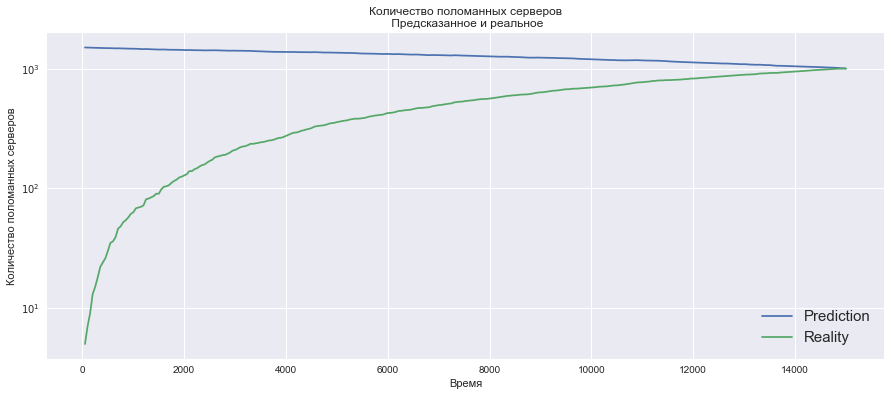

In [74]:
pred_1 = plot_predictions(0.1, t_0, t)

In [76]:
# Предсказания:
pred_15

[224255,
 223507,
 222759,
 222013,
 221265,
 220518,
 219772,
 219024,
 218276,
 217530,
 216785,
 216036,
 215289,
 214546,
 213798,
 213052,
 212304,
 211557,
 210811,
 210063,
 209318,
 208569,
 207820,
 207072,
 206331,
 205582,
 204834,
 204086,
 203340,
 202590,
 201848,
 201103,
 200354,
 199606,
 198861,
 198115,
 197368,
 196623,
 195875,
 195128,
 194381,
 193639,
 192889,
 192144,
 191397,
 190652,
 189906,
 189158,
 188414,
 187669,
 186923,
 186181,
 185434,
 184686,
 183939,
 183190,
 182444,
 181699,
 180956,
 180209,
 179464,
 178720,
 177973,
 177225,
 176479,
 175735,
 174985,
 174237,
 173489,
 172742,
 171993,
 171246,
 170500,
 169751,
 169004,
 168258,
 167513,
 166764,
 166018,
 165274,
 164530,
 163786,
 163041,
 162292,
 161546,
 160802,
 160055,
 159310,
 158563,
 157818,
 157076,
 156330,
 155582,
 154834,
 154086,
 153341,
 152597,
 151850,
 151102,
 150357,
 149610,
 148864,
 148117,
 147369,
 146625,
 145878,
 145131,
 144381,
 143632,
 142885,
 142137,
 